In [2]:
import numpy as np
from scipy.signal import convolve2d 
from os import path, getcwd, system, getenv
from astropy.io import fits
from time import perf_counter
import urllib.request
import os

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import glob
import matplotlib.gridspec as gridspec

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import sys,inspect
currentdir = path.dirname(path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = path.dirname(currentdir)
sys.path.append(parentdir)
# from deconv import cube_deconv
# from ppxf_wrap import ppxf_wrap

# import warnings

# if True:
#     print('Set warnings.filterwarnings as "ignore"')
#     print('Warning Message will not be printed')
#     warnings.filterwarnings("ignore")

from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy import constants
import pandas as pd

# import plotly.express as px
from astroquery.mast import Observations


from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.nddata.utils import Cutout2D

from astropy.wcs import WCS
import astropy

In [3]:
def set_rcparams_prop(amp=1, fs=22, tickamp=None):
#     fs=18
    if tickamp==None:
        tickamp=amp
    tickmajorwidth=2.5*amp
    tickminorwidth=2.5*amp
    axeslw=2.5*amp
    tmjs=6*tickamp
    tmns=tmjs/3.5*2
    plt.rcParams['axes.titlesize']=fs
    plt.rcParams['axes.labelsize']=fs
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    plt.rcParams['axes.linewidth'] = axeslw
    plt.rcParams['xtick.major.width'] = tickmajorwidth
    plt.rcParams['ytick.major.width'] = tickmajorwidth
    plt.rcParams['xtick.minor.width'] = tickminorwidth
    plt.rcParams['ytick.minor.width'] = tickminorwidth
    plt.rcParams['xtick.major.size'] = tmjs
    plt.rcParams['ytick.major.size'] = tmjs
    plt.rcParams['xtick.minor.size'] = tmns
    plt.rcParams['ytick.minor.size'] = tmns

In [4]:

obs_table = Observations.query_region("322.49324 12.16683")

In [5]:
# objnames=['M 82','NGC 7090','NGC 4736','NGC 5055','NGC 2403',
#           'NGC 5194','M 101','NGC 3031','NGC 6744','NGC 253',
#           'NGC 3079','NGC 5866','NGC 4151','NGC 1313',
#           'NGC 4631','NGC 891'
#          ]

objnames=['M 82']

obs_tables=[]
for objname in objnames:
    print(objname)
    obs_tables.append(Observations.query_criteria(obs_collection='FUSE',objectname=objname, radius=".5 deg"))
# objname='NGC4631'
# obs_table = Observations.query_criteria(filters=["FUV","GALEX"],objectname=objname, radius=".02 deg")
# obs_table = Observations.query_criteria(filt=["FUSE"],objectname=objname, radius=".5 deg")
obs_table = Observations.query_criteria(obs_collection='FUSE',objectname="NGC4631", radius=".5 deg")


M 82


In [6]:

# Table: 
# Galaxy, Program ID, N pointings (exp >5000s), RA, DEC, Max Exp, Mean Exp
# *note on aperture
# *RA DEC unit check

print(obs_tables[0]['target_name'])
obs_tables[0].colnames
obs_tables[4]

exptimes=obs_tables[4]['t_exptime']
print(exptimes)
cond=exptimes>5000
# print(obs_tables[4][cond])
fexptimes=obs_tables[4][cond]['t_exptime']
# cond
print(obs_tables[4][0])
down_dir='C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp'
pl=Observations.get_product_list(obs_tables[4])
# np.sum(pl['productType']=="SCIENCE")
# pl.colnames
urls=pl['dataURI']
rr=[x.find('00000all4ttag') for x in urls]

target_name
-----------
      M82-A
      M82-B
      M82-C
      M82-D


IndexError: list index out of range

In [7]:
pl['obs_id']
pl.colnames

NameError: name 'pl' is not defined

In [8]:
urls

NameError: name 'urls' is not defined

In [10]:
# aa=np.array(rr)
# print(np.sum(aa>0))
# obs_tables[4]

# urls[aa>0]
# # pl
# pl['productFilename']

fnames=[]


#download files
down_dir='C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/'
for i in range(len(obs_tables)):
# for i in [6]:
    otb=obs_tables[i]
    pl=Observations.get_product_list(obs_tables[i])
    urls=pl['dataURI']
    rr=[x.find('00000all2ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    print(urls)
    manifest = Observations.download_products(dpl, download_dir=down_dir)
    print(obs_tables[i]['target_name'])
    print(manifest)
    
    rr=[x.find('00000all4ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    print(urls)
    manifest = Observations.download_products(dpl, download_dir=down_dir)
    print(obs_tables[i]['target_name'])
    print(manifest)
    
#     rr=[x.find('00000all3ttag') for x in urls]
#     dpl=pl[np.array(rr)>0]
#     print(urls)
#     manifest = Observations.download_products(dpl, download_dir=down_dir)
#     print(obs_tables[i]['target_name'])
#     print(manifest)
    
#     exptimes=obs_tables[4]['t_exptime']
# #     print(exptimes)
# #     cond=exptimes>5000
#     # print(obs_tables[4][cond])
#     fexptimes=obs_tables[4][cond]['t_exptime']
    

                               dataURI                               
---------------------------------------------------------------------
      mast:FUSE/url/pub/fuse/data/c1310101/c1310101001fesafraw.fit.gz
      mast:FUSE/url/pub/fuse/data/c1310101/c1310101701fesafraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010011attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010011bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010012attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010012bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010021attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010021bttagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010022attagfraw.fit.gz
    mast:FUSE/url/pub/fuse/data/c1310101/c13101010022bttagfraw.fit.gz
                                                                  ...
mast:FUSE/url/pub/fuse/data/c1310401/c13104010031blif4ttagfcal.fit.gz
mast:FUSE/url/pub/fu

INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310101000\c131010100000all4ttagfcal.fit.gz with expected size 613259. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310201000\c131020100000all4ttagfcal.fit.gz with expected size 615430. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310301000\c131030100000all4ttagfcal.fit.gz with expected size 617437. [astroquery.query]
INFO: Found cached file C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/mastDownload\FUSE\c1310401000\c131040100000all4ttagfcal.fit.gz with expected size 616795. [astroquery.query]
target_name
-----------
      M82-A
      M82-B
      M82-C
      M82-D
                                                     Local Path                                                      ...
-----------------------------------------------------------

In [11]:
down_dir='C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/temp/'
# for i in range(len(obs_tables)):

df=pd.DataFrame()

# for i in range(1):
for i in range(len(obs_tables)):
    otb=obs_tables[i]
    pl=Observations.get_product_list(obs_tables[i])
    urls=pl['dataURI']
    rr=[x.find('00000all4ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    objname=objnames[i]
    for j in range(len(dpl)):
#     for j in range(1):
        fdir=down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
        hdu=fits.open(fdir)
        hdr=hdu[0].header
        sri=pd.Series({'objname':objname, 
                       'targname':hdr['TARGNAME'],
                       'ra':hdr['RA_TARG'],
                       'dec':hdr['DEC_TARG'],
                       'pa':hdr['APER_PA'],
                       'aperture':hdr['APERTURE'],
                       'programid':hdr['PRGRM_ID'],
                       'exptime':hdr['OBSTIME'],
                       'obsmode':hdr['INSTMODE'],
                       'fdir':down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
                      })
        print(hdr['APERTURE'])
        df=df.append(sri, ignore_index=True)
        
    rr=[x.find('00000all2ttag') for x in urls]
    dpl=pl[np.array(rr)>0]
    objname=objnames[i]
    for j in range(len(dpl)):
#     for j in range(1):
        fdir=down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
        hdu=fits.open(fdir)
        hdr=hdu[0].header
        sri=pd.Series({'objname':objname, 
                       'targname':hdr['TARGNAME'],
                       'ra':hdr['RA_TARG'],
                       'dec':hdr['DEC_TARG'],
                       'pa':hdr['APER_PA'],
                       'aperture':hdr['APERTURE'],
                       'programid':hdr['PRGRM_ID'],
                       'exptime':hdr['OBSTIME'],
                       'obsmode':hdr['INSTMODE'],
                       'fdir':down_dir+'mastDownload/FUSE/'+dpl[j]['obs_id']+'/'+dpl[j]['productFilename']
                      })
        print(hdr['APERTURE'])
        df=df.append(sri, ignore_index=True)

# hdr        
#     manifest = Observations.download_products(dpl, download_dir=down_dir)
#     print(manifest)

LWRS
LWRS
LWRS
LWRS


C:\Users\maxri\AppData\Local\Temp\ipykernel_13484\3777488710.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_13484\3777488710.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_13484\3777488710.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_13484\3777488710.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(sri, ignore_index=True)


In [12]:
# ndf.loc[0,'ra']
df.columns

Index(['objname', 'targname', 'ra', 'dec', 'pa', 'aperture', 'programid',
       'exptime', 'obsmode', 'fdir'],
      dtype='object')

In [13]:
# ndf[ndf['objname']=='M 101']
# ndf['objname']

In [14]:
tcut=5000
tcut=2000
ndf=df[df['exptime']>tcut]

df2=pd.DataFrame()


for i in range(len(objnames)):
    print(objnames[i])
    adf=ndf[ndf['objname']==objnames[i]]
    adf.index=np.arange(len(adf))
    sri=pd.Series({
        'objname':objnames[i],
        'ra':adf.loc[0,'ra'],
        'dec':adf.loc[0,'dec'],
        'npt':len(adf),
        'maxexp':np.max(adf.loc[:,'exptime'].values),
        'meanexp':np.mean(adf.loc[:,'exptime'].values),
    })
    df2=df2.append(sri, ignore_index=True)
df2


# Table: 
# Galaxy, Program ID, N pointings (exp >5000s), RA, DEC, Max Exp, Mean Exp
# *note on aperture
# *RA DEC unit check


M 82


C:\Users\maxri\AppData\Local\Temp\ipykernel_13484\1836014309.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(sri, ignore_index=True)


,objname,ra,dec,npt,maxexp,meanexp
0,M 82,148.987917,69.66375,4,11049.0,9401.75


In [16]:
def fstr(x):
    return x

def ff6(x):
    return '%.6f' % x


def ff4(x):
    return '%.4f' % x

def ff1(x):
    return '%.1f' % x

def ff2(x):
    return '%.2f' % x

def fint(x):
    return '%i' % x

def detection_check(x):
    if x>3:
        return 'Y'
    else:
        return 'N'

    
def rec_rotate(cx, cy, wx, wy, ang_deg): #angle: clocowise rot from 12h
    ang_rad=np.radians(ang_deg)
    wd=(wx**2+wy**2)**0.5
    ang_diagonal=np.arctan(wy/wx)
    ang_new=ang_diagonal+ang_rad
    rx=cx-wd/2*np.cos(ang_new)
    ry=cy-wd/2*np.sin(ang_new)
    return rx, ry
    
df2['randec']=df2['ra'].apply(ff4)+', '+df2['dec'].apply(ff4)
df2['totalexp']=df2['meanexp']*df2['npt']

# coords = SkyCoord(df2['ra'], df2['dec'], frame='icrs', unit=(u.hourangle, u.deg))
coords = SkyCoord(df2['ra'], df2['dec'], frame='icrs', unit=(u.deg, u.deg))
df2['l']=coords.galactic.l.degree
df2['b']=coords.galactic.b.degree
#df2['rvel']=[269,850,308,500,133,465,241,-39,841,259,1127,757,976,470,610,528]
df2['rvel']=[269]

df2['lnb']=df2['l'].apply(ff4)+', '+df2['b'].apply(ff4)

df2['owave']=1031.9*(1+df2['rvel']/299790)

# fmts=[fstr, ff4, ff4, fint, fint, fint]
# fmts=[fstr, ff4, ff4, fint, fint, fint,ff1]
fmts=[fstr, fstr, fint, fint, fint,ff1]
# fmts=[fstr, fstr, fint, fint, fint, fint]
# ridx1=[8,9,3,4,5,6,7,0,1,2]
latex_text=df2.to_latex(index=False, header=False,
                        formatters=fmts,
#              columns=['objname','ra','dec','npt','maxexp','totalexp'])
#              columns=['objname','l','b','npt','maxexp','totalexp'])
#              columns=['objname','l','b','npt','maxexp','totalexp','owave'])
             columns=['objname','lnb','npt','maxexp','totalexp','owave'])
#              columns=['objname','ra','dec','npt','maxexp','meanexp'])
print(latex_text)

print('\hline')
print(' & & & '+fint(np.sum(df2['npt']))+' & &  '+fint(np.sum(df2['npt']*df2['meanexp'])))

# df2.to_csv('adap_2022_targets.csv')

\begin{tabular}{llrrrr}
\toprule
M 82 & 141.4213, 40.5818 & 4 & 11049 & 37607 & 1032.8 \\
\bottomrule
\end{tabular}

\hline
 & & & 4 & &  37607


C:\Users\maxri\AppData\Local\Temp\ipykernel_13484\3565807459.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_text=df2.to_latex(index=False, header=False,


In [17]:
np.min(df2['totalexp']),np.max(df2['totalexp'])
df2

,objname,ra,dec,npt,maxexp,meanexp,randec,totalexp,l,b,rvel,lnb,owave
0,M 82,148.987917,69.66375,4,11049.0,9401.75,"148.9879, 69.6637",37607.0,141.421333,40.581759,269,"141.4213, 40.5818",1032.825918


In [18]:
# ff4(df2['ra'])+','+ff4(df2['dec'])
# ff4(df2['ra'])
# df2['ra'].apply(ff4, axis=0)
# df2['ra'].apply(ff4)+', '+df2['dec'].apply(ff4)
df2['meanexp']*df2['npt']

0    37607.0
dtype: float64

In [19]:
file_dir='C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/images_red'
file_path=np.array(glob.glob(file_dir+'**/*fits'))
file_path[0].split('_')
# file_path[0].split('/')

fdf=pd.DataFrame()
for i in range(len(file_path)):
    fp=file_path[i]
    print(fp)
    sri=pd.Series({'ra':fp.split('_')[2],
                   'dec':fp.split('_')[3],
                   'file_path':file_dir+'/'+fp.split('/')[-1],
                   'filename':fp.split('/')[-1],
                  })
    fdf=fdf.append(sri, ignore_index=True)
print(fdf)

print(fdf.filename[0])
print(fdf.file_path[0])

fdf.file_path[0]

# fdf2  = os.path.normpath(fdf['file_name'])
# b= fits.open('C:\\Users\\maxri\\Desktop\\Classes 4-1\\Research\\fuse\images_red\\0001_148.969690000_69.679380000_dss1red_XE036.fits')
#              'C:\\Users\\maxri\\Desktop\\Classes 4-1\\Research\\fuse\\images_red\\fuse\\images_red\\0001_148.969690000_69.679380000_dss1red_XE036.fits'

C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_red\0001_148.969690000_69.679380000_dss1red_XE036.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_red\0001_148.969690000_69.679380000_dss1red_XE037.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_red\0001_148.969690000_69.679380000_dss2red_XP061.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_red\0001_148.969690000_69.679380000_dss2red_XP062.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_red\0001_49.56688000_-66.49825000_dss2red_XS054.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_red\0001_49.56688000_-66.49825000_dss2red_XS082.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_red\0001_49.56688000_-66.49825000_dss2red_XS083.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_red\0002_324.120250000_-54.557330000_dss2red_XS188.fits
C:/Users/maxri/Desktop/Classes 4-1/Research/fuse\images_red\0003_192.721090000_41.120460000_dss1red_XE217.fits
C:/Use

C:\Users\maxri\AppData\Local\Temp\ipykernel_13484\1685734302.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_13484\1685734302.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_13484\1685734302.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Temp\ipykernel_13484\1685734302.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fdf=fdf.append(sri, ignore_index=True)
C:\Users\maxri\AppData\Local\Tem

'C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/images_red/fuse\\images_red\\0001_148.969690000_69.679380000_dss1red_XE036.fits'

In [21]:
i=0
fits_file=match_df.loc[fidx[i],'file_path']
fits_file=fits_file[0:62] + fits_file[78:]
print(fits_file)
print(os.path.normpath(fits_file))

C:/Users/maxri/Desktop/Classes 4-1/Research/fuse/images_red/fu01_148.969690000_69.679380000_dss1red_XE036.fits
C:\Users\maxri\Desktop\Classes 4-1\Research\fuse\images_red\fu01_148.969690000_69.679380000_dss1red_XE036.fits


M 82
0
npt 4


<Figure size 1440x2160 with 0 Axes>

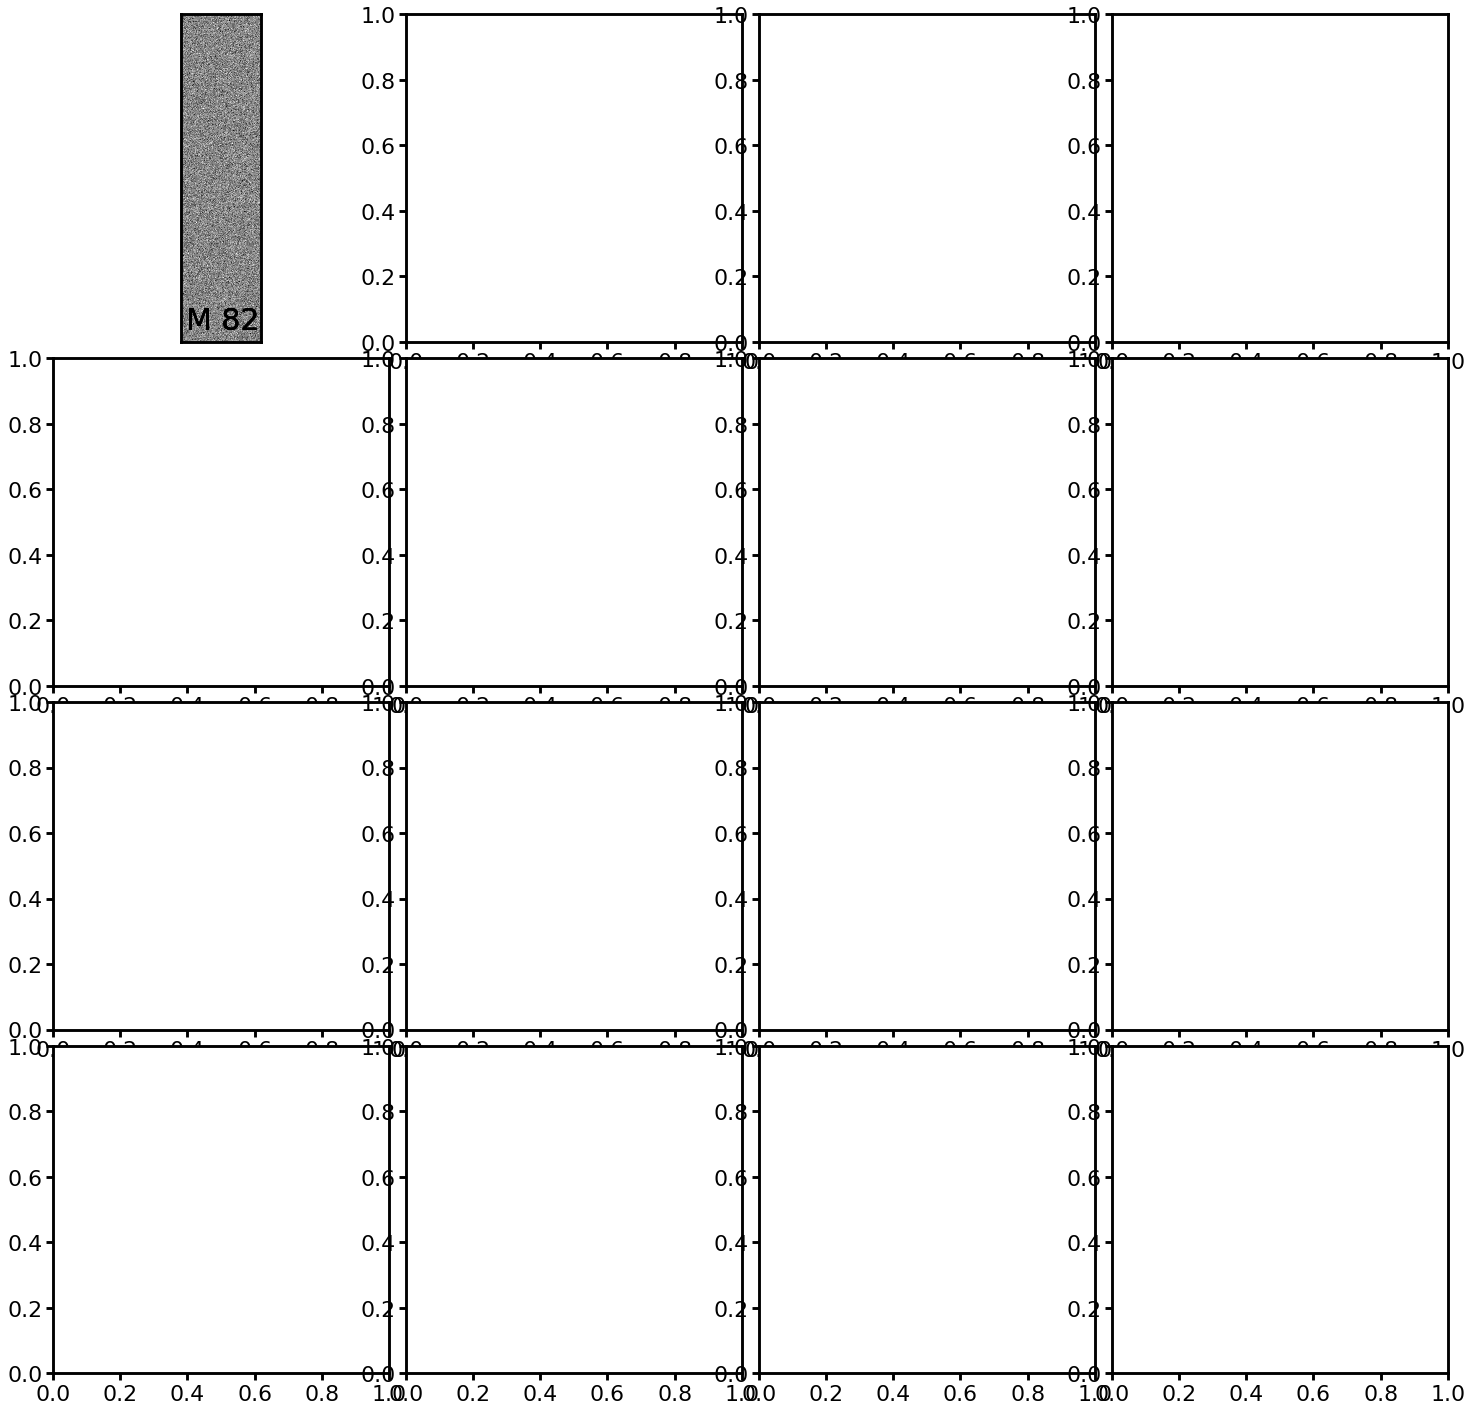

In [20]:
set_rcparams_prop(amp=1.15)

rr=1
aa=6
wrs=np.array([1.8, 0.2, 1.2, 0.05])
hrs=np.array([1])
fig = plt.figure(figsize=(20, 30))
fig = plt.figure(figsize=(25, 25))
ncol=4
nrow=4
gs1 = gridspec.GridSpec(nrow, ncol, figure=fig, 
#                         width_ratios=wrs, height_ratios=hrs,
                        hspace=0.05, wspace=0.05
                       )
pidxs=np.arange(ncol*nrow)
axs=[]
for i in range(len(pidxs)):
    ax=fig.add_subplot(gs1[i // ncol, i%ncol])
    axs.append(ax)


fidx=[0,0,0,0,0,
      0,0,1,0,0,
      0,0,0,0,0,
      0,0,0,0
     ]

cut_widths=np.array([
    350,300,400,400,
    400,400,1400,1600,
    600,1600,300,250,
    250,250,500,400,
])/3600*2


raoffs=np.array(
    [0,0,0,0,
     0.7,0,-0.4,0,
     0,0,0,0,
     0,0,0,0,
    ]
)

decoffs=np.array(
    [0.1,0,-0.05,-0.05,
     -0.1,0,0,0,
     0,0,0,0,
     0,0,-0.05,0,
    ]
)

minsep=0.5
file_sc=SkyCoord(fdf.ra, fdf.dec, frame='icrs', unit='deg')    
for i in range(len(objnames)):
# for i in range(8):
    ax=axs[i]
    objname=objnames[i]
    print(objname)
    sdf=df.loc[df['objname']==objname,:]
    sdf.index=np.arange(len(sdf))
    ra0, dec0=sdf.loc[0,'ra'], sdf.loc[0,'dec']
#     print(ra0, dec0)
    c = SkyCoord(ra0, dec0, frame='icrs', unit='deg')
    cond=np.array(file_sc.separation(c))<minsep
    match_df=fdf[cond]
    match_df.index=np.arange(np.sum(cond))
    # print(match_df.loc[fidx[i],'file_path'][0:44] + match_df.loc[fidx[i],'file_path'][60:])
    #fits_file=match_df.loc[fidx[i],'file_path']
    fits_file=match_df.loc[fidx[i],'file_path'][0:44] + match_df.loc[fidx[i],'file_path'][60:]
    print(fidx[i])
    hdu=fits.open(os.path.normpath(fits_file))
    hdr=hdu[0].header
    oiwcs=astropy.wcs.WCS(header=hdr) 
#     print(fits_file)
    
    cmap=cm.gray_r
    origin='lower'

    oim=hdu[0].data

    ra0, dec0=sdf.loc[0,'ra']+cut_widths[i]*raoffs[i], sdf.loc[0,'dec']+cut_widths[i]*decoffs[i]
#     print(ra0, dec0)
    cc = SkyCoord(ra0, dec0, frame='icrs', unit='deg')
    
    img_cutout_obj=Cutout2D(oim, cc, 
                       u.Quantity(cut_widths[i], unit='deg'),
                       wcs=oiwcs,
                    mode='trim',
#                     mode='partial',
                   )
    im=img_cutout_obj.data
    iwcs=img_cutout_obj.wcs

    
    img=ax.matshow(im, 
               cmap=cmap, 
               origin=origin, interpolation='none', 
#                zorder=1,
#               alpha=alpha, zorder=zorder, aspect=aspect, 
#                norm=matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)
                  )
#     print(objname)
    print('npt',len(sdf))
    
    for j in range(len(sdf)):
        jra, jdec=sdf.loc[j,'ra'], sdf.loc[j,'dec']        
        c_obj=SkyCoord(jra, jdec, 
                                          unit='deg',
                                          frame='icrs')
        if sdf.loc[j,'aperture']=='MDRS':
            sep=u.Quantity(-90.18-118.07, unit='arcsec')
            c_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)
            print('MDRS!!!')

        sep=u.Quantity(90.18+118.07, unit='arcsec')
        m_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)
        sep=u.Quantity(-10.27+118.07, unit='arcsec')
        h_obj=c_obj.directional_offset_by(u.deg*(sdf.loc[j,'pa']+180), sep)
         
        objs=[c_obj, m_obj, h_obj]
        xws=[30,4,1.25]
        yws=[30,20,20]
        clrs=['m','c','r']
        
        for k in range(3):
            pcent_x, pcent_y=iwcs.world_to_pixel(objs[k])
            psm=iwcs.pixel_scale_matrix
            pscale=(psm[0,0]**2+psm[0,1]**2)**0.5
    #         print('pscale',pscale)
            pxwidth=xws[k]/3600/pscale
            pywidth=yws[k]/3600/pscale
#             edgecolor='m'
            edgecolor=clrs[k]
    #         edgecolor='k'
            sqlw=2


            rot_ang=0
            rot_ang=sdf.loc[j,'pa']
            recx, recy=rec_rotate(pcent_x, pcent_y, pxwidth, pywidth, rot_ang)
            rec=matplotlib.patches.Rectangle((recx, recy,), pxwidth, pywidth, alpha=1, 
                                             angle=rot_ang,
                                             zorder=20,
        #     rec=matplotlib.patches.Rectangle((pcent_x-pxwidth/2,pcent_y-pywidth/2), pxwidth, pywidth, alpha=1, 
        #                                      angle=(-180),
        #                                   facecolor='w', fill=True)
                                    linewidth=sqlw, edgecolor=edgecolor, linestyle='-', fill=False)
            #                                               linewidth=1.5, edgecolor='w', linestyle=esty[k-1], fill=False)
            art=ax.add_artist(rec)
        ax.text(0.98,0.02,objname,
                horizontalalignment='right',
                verticalalignment='bottom',
                transform=ax.transAxes,
                size=30
               )
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        
#         pcent_x, pcent_y=iwcs.world_to_pixel(m_obj)
#         psm=iwcs.pixel_scale_matrix
#         pscale=(psm[0,0]**2+psm[0,1]**2)**0.5
# #         print('pscale',pscale)
#         pxwidth=4/3600/pscale
#         pywidth=20/3600/pscale
#         edgecolor='c'
# #         edgecolor='k'
#         sqlw=3

        
#         rot_ang=0
#         rot_ang=sdf.loc[j,'pa']
#         recx, recy=rec_rotate(pcent_x, pcent_y, pxwidth, pywidth, rot_ang)
#         rec=matplotlib.patches.Rectangle((recx, recy,), pxwidth, pywidth, alpha=1, 
#                                          angle=rot_ang,
#                                          zorder=20,
#     #     rec=matplotlib.patches.Rectangle((pcent_x-pxwidth/2,pcent_y-pywidth/2), pxwidth, pywidth, alpha=1, 
#     #                                      angle=(-180),
#     #                                   facecolor='w', fill=True)
#                                 linewidth=sqlw, edgecolor=edgecolor, linestyle='-', fill=False)
#         #                                               linewidth=1.5, edgecolor='w', linestyle=esty[k-1], fill=False)
#         art=ax.add_artist(rec)
    
csp=0.0
fig.subplots_adjust(wspace=csp, hspace=csp)

# aa=cc.separation(c)
# np.array(Angle(aa, unit=u.deg))<0.5
match_df
fname='adap_target_pointings2022.pdf'
fig.savefig(fname,dpi=256, bbox_inches='tight')

In [ ]:
fdf.ra


In [ ]:
['obsID',
 'obs_collection',
 'dataproduct_type',
 'obs_id',
 'description',
 'type',
 'dataURI',
 'productType',
 'productGroupDescription',
 'productSubGroupDescription',
 'productDocumentationURL',
 'project',
 'prvversion',
 'proposal_id',
 'productFilename',
 'size',
 'parent_obsid',
 'dataRights',
 'calib_level']

In [ ]:
# print(obs_table)
# np.sum(obs_table['obs_collection']=='FUSE')
obs_table
# products = Observations.get_product_list(obs_table[0])
# products
data_url=obs_table[0]['dataURL']
cdir='./galex_fits/'
fname='_'.join([objname,'galex','fuv'])+'.fits.gz'
print(data_url)
print(cdir+fname)
# urllib.request.urlretrieve(data_url, cdir+fname)

In [ ]:
obs_table

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy
from matplotlib import ticker
# import dotifs_util as util
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoLocator, FixedLocator,
                               AutoMinorLocator)
# import util
from scipy.optimize import curve_fit


import numpy as np
from scipy import constants
from scipy.interpolate import interp1d
import time
from os import path, getcwd
#from os import getcwd
import inspect
from math import pi
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
from scipy.signal import convolve as scipyconvolve
import glob
stof=2*(2*np.log(2))**0.5

from astropy.io import fits

import math
import healpy as hp
import pylab

from astropy import units as u
from astropy.coordinates import SkyCoord


# from __future__ import print_function
from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery

import csv
import numpy as np
import extinction
import requests
import pandas as pd
from PIL import Image, ImageDraw, ImageFilter
#import time
import os
from astroquery.simbad import Simbad
from astropy import units as u

import warnings
warnings.filterwarnings("ignore")


In [ ]:
def set_rcparams_prop(amp=1, fs=22):
#     fs=18
    tickmajorwidth=2.5*amp
    tickminorwidth=2.5*amp
    axeslw=2.5*amp
    tmjs=6*amp
    tmns=tmjs/3.5*2*amp
    plt.rcParams['axes.titlesize']=fs
    plt.rcParams['axes.labelsize']=fs
    plt.rcParams['xtick.labelsize']=fs
    plt.rcParams['ytick.labelsize']=fs
    plt.rcParams['axes.linewidth'] = axeslw
    plt.rcParams['xtick.major.width'] = tickmajorwidth
    plt.rcParams['ytick.major.width'] = tickmajorwidth
    plt.rcParams['xtick.minor.width'] = tickminorwidth
    plt.rcParams['ytick.minor.width'] = tickminorwidth
    plt.rcParams['xtick.major.size'] = tmjs
    plt.rcParams['ytick.major.size'] = tmjs
    plt.rcParams['xtick.minor.size'] = tmns
    plt.rcParams['ytick.minor.size'] = tmns

In [ ]:
# df_sim = Simbad.query_object(galaxies['Object Name'][i])
df_sim = Simbad.query_object('NGC 4631')

In [ ]:
df_sim.columns
# df_sim.loc['RA',:]
print(df_sim['RA'], df_sim['DEC'])
coords = SkyCoord(df_sim['RA'], df_sim['DEC'], frame='icrs', unit=(u.hourangle, u.deg))
# coords = SkyCoord(df_sim['RA'], df_sim['DEC'], frame='icrs')
coords

In [ ]:
gal_list=[
    "NGC 4631",
    "NGC 3003",
    "NGC 891",
    "NGC 5746",
    "NGC 1353",
    "NGC 253",
    "NGC 3692",
    "NGC 3044",
    "NGC 5775",
    "NGC 4666",
    "NGC 625",
    "NGC 7064",
    "NGC 1406",
    "NGC 1448",
    "NGC 660",
    "IC 5052",
    "M82",
    "NGC 7582",
]

In [ ]:
df_res=Simbad.query_objects(gal_list)
coords = SkyCoord(df_res['RA'], df_res['DEC'], frame='icrs', unit=(u.hourangle, u.deg))
coords

gdf=pd.DataFrame({
    'name':df_res['MAIN_ID'],   
    'ra':coords.ra.degree,
    'dec':coords.dec.degree,
    'l':coords.galactic.l.degree,
    'b':coords.galactic.b.degree,
})
gdf



In [ ]:
def under_sample(arr):
    iarr=arr[[np.arange(len(arr)//4)*4]]
    iarr=iarr+arr[[np.arange(len(arr)//4)*4+1]]
    iarr=iarr+arr[[np.arange(len(arr)//4)*4+2]]
    iarr=iarr+arr[[np.arange(len(arr)//4)*4+3]]
    return iarr/4

def under_sample(arr):
    val0=arr[[np.arange(len(arr)//4)*4]]
    val1=arr[[np.arange(len(arr)//4)*4+1]]
    val2=arr[[np.arange(len(arr)//4)*4+2]]
    val3=arr[[np.arange(len(arr)//4)*4+3]]
    tval=val0+val1+val2+val3
    non0=(val0>0)*1+(val1>0)*1+(val2>0)*1+(val3>0)*1
    tval=tval/non0
    tval[non0==0]=0
    return tval


def mag2flam(mag, zero_pt=21.1, ABwave=None):
    if np.any(ABwave != None):
        return 10.**(-0.4*(mag+2.406+5*np.log10(ABwave)))
    return 10.**(-0.4*(mag+zero_pt))

In [ ]:
lon_plot=np.radians(360-gdf['l'])
lat_plot=np.radians((gdf['b']))
lon_plot[lon_plot>np.pi]=lon_plot[lon_plot>np.pi]-2*np.pi

In [ ]:
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection="mollweide")

markersize=1

# rplon=np.radians(lon_plot)
# rplat=np.radians(lat_plot)
# rplon[rplon>np.pi]=rplon[rplon>np.pi]-2*np.pi

ax.scatter(lon_plot, lat_plot,
# ax.scatter(plon, plat,
#             -aspera_targets_ra.wrap_at(180 * u.deg).radian,
#             aspera_targets_dec.radian,
            marker="o",
            s=markersize*20,
            c="blue",
#             label='Aspera Science Targets'
            )

# odf=pd.DataFrame({
#     'gal_lon':plon,
#     'gal_lat':plat,}
# )
# print(len(odf))
# odf.to_csv('nox_target_coord_galactic.csv')

In [ ]:
gdf